# Comparing an N times composition with a better value for $\sigma$ with applying the Gaussian mechanism once!


In [62]:
# enable relative imports
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np

In [63]:
from src.compute_eps import get_epsilon_bounded, get_epsilon_unbounded

## Consider the add/remove a data-point case
This is what the normal moments accountant usually calculates. In this code, this is known as the 'unbounded' case as far as I can tell.

**Note, I had to add a sampling probability here, unsure how this affects things precisely. ** 

In [69]:
# run up to 100 times, neglect subsampling
n_i = np.arange(1, 15)
sigma_tilde = 10

end_privacy = []
intermediate_privacy = []

for n in n_i:
    print("\nNoise Added at the End Privacy")
    sigma_true = sigma_tilde / n
    eps = get_epsilon_unbounded(q=0.8, sigma=sigma_true, ncomp=1)
    end_privacy.append(eps)
    
    print("\nIntermediate Noise Added Privacy")
    sigma_true = sigma_tilde
    eps = get_epsilon_unbounded(q=0.8, sigma=sigma_true, ncomp = n)
    intermediate_privacy.append(eps)


Noise Added at the End Privacy
Unbounded DP-epsilon after 1 compositions:0.32468870644361975 (delta=1e-06)

Intermediate Noise Added Privacy
Unbounded DP-epsilon after 1 compositions:0.32468870644361975 (delta=1e-06)

Noise Added at the End Privacy
Unbounded DP-epsilon after 1 compositions:0.7050308140515458 (delta=1e-06)

Intermediate Noise Added Privacy
Unbounded DP-epsilon after 2 compositions:0.46573014158904846 (delta=1e-06)

Noise Added at the End Privacy
Unbounded DP-epsilon after 1 compositions:1.1212237376738468 (delta=1e-06)

Intermediate Noise Added Privacy
Unbounded DP-epsilon after 3 compositions:0.5759652191915317 (delta=1e-06)

Noise Added at the End Privacy
Unbounded DP-epsilon after 1 compositions:1.5657519604825731 (delta=1e-06)

Intermediate Noise Added Privacy
Unbounded DP-epsilon after 4 compositions:0.6700936216576835 (delta=1e-06)

Noise Added at the End Privacy
Unbounded DP-epsilon after 1 compositions:2.033363793653404 (delta=1e-06)

Intermediate Noise Added P

Text(0, 0.5, '$\\epsilon, \\delta = 10^{-5}$')

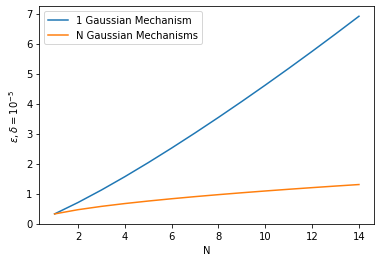

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(n_i, np.array(end_privacy))
plt.plot(n_i, np.array(intermediate_privacy))
plt.legend(['1 Gaussian Mechanism', 'N Gaussian Mechanisms'])
plt.xlabel('N')
plt.ylabel('$\\epsilon, \\delta = 10^{-5}$')

## Let's try with the substitution relation
This is the new Réyni DP accountant (I haven't looked into this paper)


In [71]:
# run up to 100 times, neglect subsampling
n_i = np.arange(1, 15)
sigma_tilde = 10

end_privacy = []
intermediate_privacy = []

for n in n_i:
    print("\nNoise Added at the End Privacy")
    sigma_true = sigma_tilde / n
    eps = get_epsilon_bounded(q=1, sigma=sigma_true, ncomp=1)
    end_privacy.append(eps)
    
    print("\nIntermediate Noise Added Privacy")
    sigma_true = sigma_tilde
    eps = get_epsilon_bounded(q=1, sigma=sigma_true, ncomp = n)
    intermediate_privacy.append(eps)


Noise Added at the End Privacy
Bounded DP-epsilon after 1 compositions:0.8341175469525706 (delta=1e-06)

Intermediate Noise Added Privacy
Bounded DP-epsilon after 1 compositions:0.8341175469525706 (delta=1e-06)

Noise Added at the End Privacy
Bounded DP-epsilon after 1 compositions:1.765644397911207 (delta=1e-06)

Intermediate Noise Added Privacy
Bounded DP-epsilon after 2 compositions:1.21196718056191 (delta=1e-06)

Noise Added at the End Privacy
Bounded DP-epsilon after 1 compositions:2.755952133607157 (delta=1e-06)

Intermediate Noise Added Privacy
Bounded DP-epsilon after 3 compositions:1.5097698466733214 (delta=1e-06)

Noise Added at the End Privacy
Bounded DP-epsilon after 1 compositions:3.797416686847197 (delta=1e-06)

Intermediate Noise Added Privacy
Bounded DP-epsilon after 4 compositions:1.7656443979177439 (delta=1e-06)

Noise Added at the End Privacy
Bounded DP-epsilon after 1 compositions:4.8865536471411035 (delta=1e-06)

Intermediate Noise Added Privacy
Bounded DP-epsilon

Text(0, 0.5, '$\\epsilon, \\delta = 10^{-5}$')

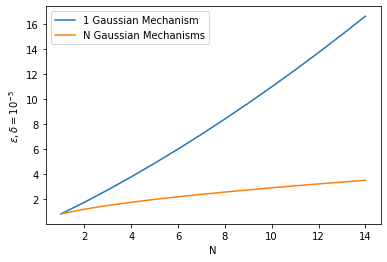

In [72]:
plt.figure()
plt.plot(n_i, np.array(end_privacy))
plt.plot(n_i, np.array(intermediate_privacy))
plt.legend(['1 Gaussian Mechanism', 'N Gaussian Mechanisms'])
plt.xlabel('N')
plt.ylabel('$\\epsilon, \\delta = 10^{-5}$')

# Alarming: Privacy Losses are Different!